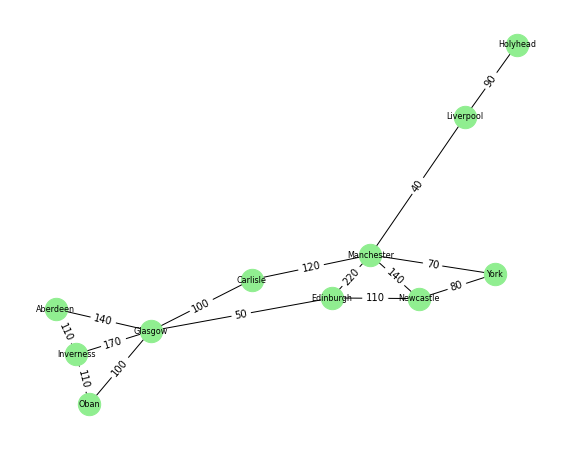

The list of the cities:
'Manchester' 
'Holyhead' 
'Liverpool'
'York'
'Carlisle'
'Newcastle'
'Glasgow'
'Edinburgh'
'Oban'
'Aberdeen'
'Inverness'
Enter the first letter of the start point: M
Enter the first letter of the end point: I
Results:

DFS:  ['Manchester', 'Edinburgh', 'Glasgow', 'Aberdeen', 'Inverness'] 
 Total driving distance:  520 miles.
BFS:  ['Manchester', 'Carlisle', 'Glasgow', 'Inverness'] 
 Total driving distance:  390 miles.
A*:  ['Manchester', 'York', 'Newcastle', 'Edinburgh', 'Glasgow', 'Oban', 'Inverness'] 
 Total driving distance:  520 miles.
Dijkstra's:  ['Manchester', 'Carlisle', 'Glasgow', 'Inverness'] 
 Total driving distance:  390 miles.
Would you like to start again : Y/N
N


In [4]:
import heapq
import math
import networkx as nx
import matplotlib.pyplot as plt

# define the map and the searching problem
graph = {
    'Manchester': {'Liverpool': 40, 'York': 70, 'Carlisle': 120, 'Newcastle':140, 'Edinburgh':220},
    'Holyhead': { 'Liverpool':90},
    'Liverpool': {'Manchester': 40, 'Holyhead': 90},
    'York': {'Manchester': 70, 'Newcastle': 80},
    'Carlisle': {'Manchester': 120, 'Glasgow': 100},
    'Newcastle': {'York': 80, 'Edinburgh': 110, 'Manchester': 140},
    'Glasgow': {'Carlisle': 100, 'Edinburgh': 50, 'Oban': 100,'Inverness':170,'Aberdeen':140 },
    'Edinburgh': {'Newcastle': 110, 'Glasgow': 50, 'Manchester': 220},
    'Oban': {'Glasgow': 100,'Inverness' : 110},
    'Aberdeen': {'Glasgow': 140, 'Inverness': 110},
    'Inverness': {'Oban': 110, 'Aberdeen': 110,'Glasgow':170}
}

# define the coordinates of the cities
coordinates = {
    'Manchester': (53.4808, -2.2426),
    'Holyhead': (53.3081, -4.6318),
    'Liverpool': (53.4084, -2.9916),
    'York': (53.9591, -1.0814),
    'Carlisle': (54.8924, -2.9326),
    'Newcastle': (54.9783, -1.6178),
    'Glasgow': (55.8642, -4.2518),        
    'Edinburgh': (55.9533, -3.1883),
    'Oban': (56.4158, -5.4713),
    'Aberdeen': (57.1497, -2.0943),
    'Inverness': (57.4778, -4.2247)
}
#Haversine formula to calculate the distance between to locations
def heuristic(a,b):
    lat1, lon1 = coordinates[a] # assigning the values of coordinates[a] to the variables lat1 and lon1.
    lat2, lon2 = coordinates[b] # assigning the values of coordinates[b] to the variables lat2 and lon2.
    R = 3959  # setting the value of R to 3959, which represents the radius of the Earth in miles.

    dlat = math.radians(lat2 - lat1) #calculating the difference in latitude between the two points and converting it to radians.
    dlon = math.radians(lon2 - lon1) #calculating the difference in longitude between the two points and converting it to radians.
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)  # calculating the haversine formula for the distance between two points.
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a)) # calculating the central angle between the two points using the inverse tangent function.
    distance = R * c # calculating the distance between the two points using the haversine formula and the Earth's radius.

    return distance


def plot_graph(graph):
    # Define the map as a networkx graph
    G = nx.Graph()
    for node in graph:
        for neighbor, distance in graph[node].items():
            G.add_edge(node, neighbor, weight=distance)

    # Set the positions of the nodes for plotting
    pos = nx.spring_layout(G)

    # Draw the nodes and edges
    fig, ax = plt.subplots(figsize=(10, 8)) # set the size of the graph
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=500) #Draw the nodes with a green color and size of 500
    nx.draw_networkx_edges(G, pos, edge_color='black') #Draw the edges with a black color


    # Draw the edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Draw the node labels
    node_labels = {node: node for node in G.nodes()} # Set the labels for the nodes
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8) # Draw the node labels with a font size of 8

    # Display the plot
    plt.axis('off')
    plt.show()


# Define the 3 searching algorithms

def dfs(graph, start, goal):   # Define the depth-first search function with the graph, start node and goal node as parameters
    stack = [(start, [start])]    # Create a stack with the start node and a path that only contains the start node
    while stack:
        (node, path) = stack.pop()           # Get the next node and its path from the stack
        if node == goal:                     # Check if the goal node has been reached
            return path                      # Return the path to the goal node
        for neighbor in graph[node]:         # Iterate over the neighbors of the current node
            if neighbor not in path:         # Check if the neighbor has already been visited
                stack.append((neighbor, path + [neighbor]))          # Add the neighbor to the stack with the updated path


def bfs(graph, start, goal):    # Define the breadth-first search function with the graph, start node, and goal node as parameters
    queue = [(start, [start])]  # Create a queue with the start node and a path that only contains the start node
    while queue:
        (node, path) = queue.pop(0)   # Get the next node and its path from the front of the queue
        if node == goal:              # Check if the goal node has been reached
            return path               # Return the path to the goal node
        for neighbor in graph[node]:  # Iterate over the neighbors of the current node
            if neighbor not in path:  # Check if the neighbor has already been visited
                queue.append((neighbor, path + [neighbor]))           # Add the neighbor to the back of the queue with the updated path


def astar(graph, heuristic, start, goal): # Define the A* search function with the graph, heuristic function, start node, and goal node as parameters
    queue = [(0, start, [start])]         # Create a priority queue with the start node and a path that only contains the start node, and a priority of 0
    while queue:
        (cost, node, path) = heapq.heappop(queue) # Get the node with the lowest cost (distance traveled so far + estimated distance remaining to the goal) from the priority queue
        if node == goal:                          # Check if the goal node has been reached
            return path                           # Return the path to the goal node
        for neighbor in graph[node]:              # Iterate over the neighbors of the current node
            if neighbor not in path:              # Check if the neighbor has already been visited
                new_cost = graph[node][neighbor] + heuristic(node, neighbor)       # Calculate the cost of traveling to the neighbor through the current node
                heapq.heappush(queue, (new_cost, neighbor, path + [neighbor]))     # Add the neighbor to the priority queue with the updated cost and path

def dijkstra(graph, start, goal):   # Define the Dijkstra's algorithm function with the graph, start node, and goal node as parameters
    queue = [(0, start, [])]        # Create a priority queue with the start node, an empty path, and a cost of 0
    visited = set()                 # Create an empty set to keep track of visited nodes
    while queue:
        (cost, node, path) = heapq.heappop(queue)   # Get the node with the lowest cost from the priority queue
        if node == goal:                            # Check if the goal node has been reached
            return path + [node]                    # Return the path to the goal node
        if node not in visited:                     # Check if the node has already been visited
            visited.add(node)                       # Add the node to the visited set
            for neighbor, weight in graph[node].items():                            # Iterate over the neighbors of the current node
                heapq.heappush(queue, (cost + weight, neighbor, path + [node]))     # Add the neighbor to the priority queue with the updated cost and path
              

def main():
   while True:
      print("The list of the cities:\n'Manchester' \n'Holyhead' \n'Liverpool'\n'York'\n'Carlisle'\n'Newcastle'\n'Glasgow'\n'Edinburgh'\n'Oban'\n'Aberdeen'\n'Inverness'")
      # Define the start and end points as their first letters
      city_codes = {city[0]: city for city in graph.keys()}

      # Ask the user for the start and end points as their first letters
      start_code = input("Enter the first letter of the start point: ")
      while start_code not in city_codes:
          print("Invalid start point, please enter a valid city's first letter.")
          start_code = input("Enter the first letter of the start point: ")
      start = city_codes[start_code]

      end_code = input("Enter the first letter of the end point: ")
      while end_code not in city_codes:
          print("Invalid end point, please enter a valid city's first letter.")
          end_code = input("Enter the  first letter of the end point: ")
      end = city_codes[end_code]
    
  # run the searching algorithms and display the results
      print("Results:\n")
      print("DFS: ", dfs(graph, start, end), "\n Total driving distance: ", sum(graph[node][path] for node, path in zip(dfs(graph, start, end), dfs(graph, start, end)[1:])), "miles.")
      print("BFS: ", bfs(graph, start, end), "\n Total driving distance: ", sum(graph[node][path] for node, path in zip(bfs(graph, start, end), bfs(graph, start, end)[1:])),"miles.")
      print("A*: ", astar(graph, heuristic, start, end), "\n Total driving distance: ", sum(graph[node][path] for node, path in zip(astar(graph, heuristic, start, end), astar(graph, heuristic, start, end)[1:])),"miles.")
      print("Dijkstra's: ", dijkstra(graph, start, end), "\n Total driving distance: ", sum(graph[node][path] for node, path in zip(dijkstra(graph, start, end), dijkstra(graph, start, end)[1:])),"miles.")

      user_input=input("Would you like to start again : Y/N\n").lower() #Ask the user if they want to stop the program or start again
      if user_input!= "y":
        break 

plot_graph(graph)
main()
